In [0]:
import pandas as pd

df= pd.read_excel('2010+v2.xlsx')

In [0]:
### Importing libraries for data processing, modelling and visualization

import sys # to access system parameters
import pandas as pd # to access a collection of functions for data processing and analysis, containis sql like functionality
import matplotlib # to access a collection of functions for scientific and publication-ready visualization
import numpy as np # foundational package for scientific computing
import scipy as sp # collection of functions for scientific computing and advance mathematics

# Formatted printing of data frames
import IPython
from IPython import display 
import sklearn # to access a collection of machine learning algorithms

# Importing misc libraries
import random
import time

# Importing model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Importing model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Importing visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configurinig visualization defaults

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Exploratory Data Analysis

## Target: 
Successful or not ( meaning patient survived over 5 years)

## Numeric data 
1. Age (creat bins)
2. Tumer Size: 0-9
3. Oval:1-9
4. reginal_node_examination: (00-negative, 01-90 positive, >90 very positive with unknown values)
5. Current - original  node change

## Categorical data
1. Sex:
2. Race:
3. State:
4. Grade:
5. Laterality: (left, right)
6. TNM: transfer into stage
7.  Surg Prime:  Death report(00,98,99),  Tumer destruction(10-19),  resection(20-80)
8.  Surgery oth rg/203:  No surgery(0),  Surgery performed(1-5),  death(9)
9.  Radiation: Intra(1,2), No(0), Rad after Sur(3), Rad before Sur(4), Both(5)
10.  Site-surgery: No (00), incisional(01,02), Exploratory (03,05), Bypass(04,06), Nos(07, 50), resection (20,80,90), Lobectomy(30,40,50), Radical(60,70)

## Binary data
1. Bone Cancer or not
2.  Chemotherapy: yes or not
3. Successful or not



# Histogram and bar charts

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246509 entries, 0 to 246508
Data columns (total 46 columns):
Patient ID                                 246509 non-null int64
Age recode with <1 year olds               246509 non-null object
Age at diagnosis                           246509 non-null int64
Year of birth                              246509 non-null int64
Year of Dignosis                           246509 non-null int64
Sex                                        246509 non-null object
Race/ethnicity                             246509 non-null object
NHIA Derived Hisp Origin                   246509 non-null object
Race recode (W, B, AI, API)                246509 non-null object
Origin recode NHIA (Hispanic, Non-Hisp)    246509 non-null object
State                                      246509 non-null object
County                                     246509 non-null object
Area-code                                  246509 non-null object
Grade                              

In [0]:
df.fillna

In [0]:
df['Stage'].describe()

In [0]:
plt.scatter(df['Stage'],df['Success'],  alpha=0.8)

## Age by success

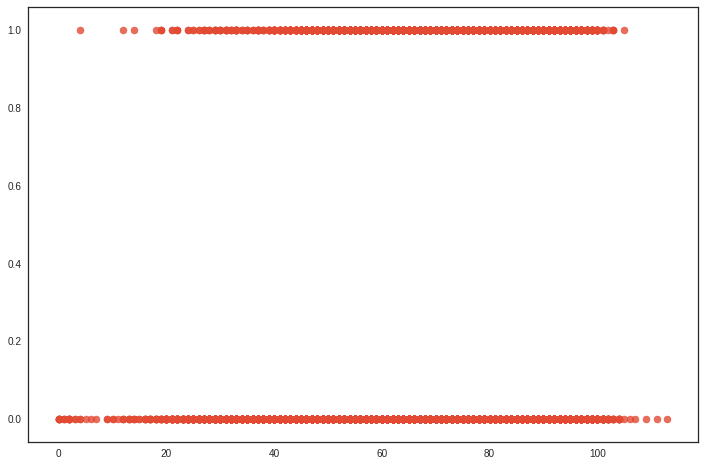

In [0]:
plt.scatter(df['Age at diagnosis'],df['Success'],  alpha=0.8)

In [0]:
plt.hist(x = [df_leadtime[df_leadtime['Success']==0]['Age at diagnosis'], 
              df_leadtime[df_leadtime['Success']==1]['Age at diagnosis']], 
         stacked=True, bins = bins_lt,
         edgecolor='black', linewidth=1.2,
         label = ['Cancelled','Flown'] ,color = ['r','g'])

#plt.title('Lead Time Histogram by Cancellation')
plt.xlabel('Lead Time(day)')
plt.ylabel('Mission Count')
plt.xticks(np.arange(0, 100, step=10),fontsize=15)
#plt.legend()
plt.show()

ind = np.arange(8)
table=pd.crosstab(df_leadtime['Age at diagnosis'],df_leadtime['Success'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                         stacked=True, color = ['r','g'])
plt.xlabel('Age at diagnosis')
plt.ylabel('Proportion')
plt.xticks(ind, ['[0,15)','[15,25)','[25,35)','[35,45)','[45,,55)','[55,65)','[65,75)','[75,100)'],rotation='horizontal',fontsize=13)

ax3.get_legend().remove()
plt.show()

NameError: ignored

## Tumor Size by Success

Text(0.5, 1.03, 'Correlations Among Features')

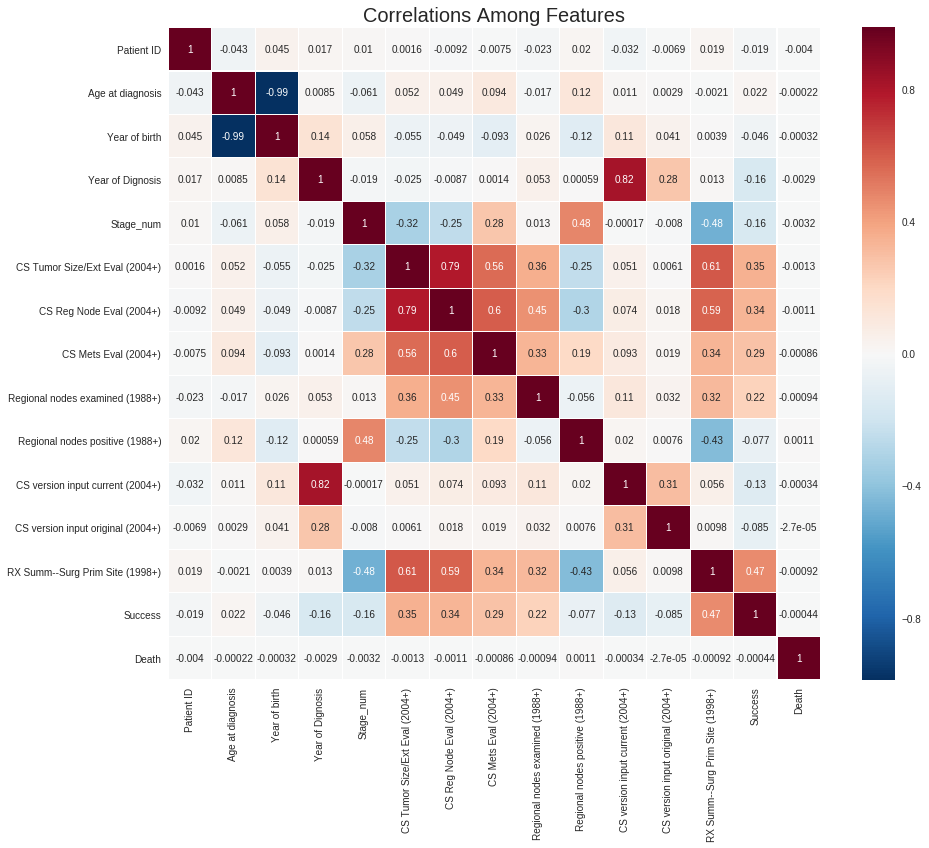

In [0]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (1,12))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


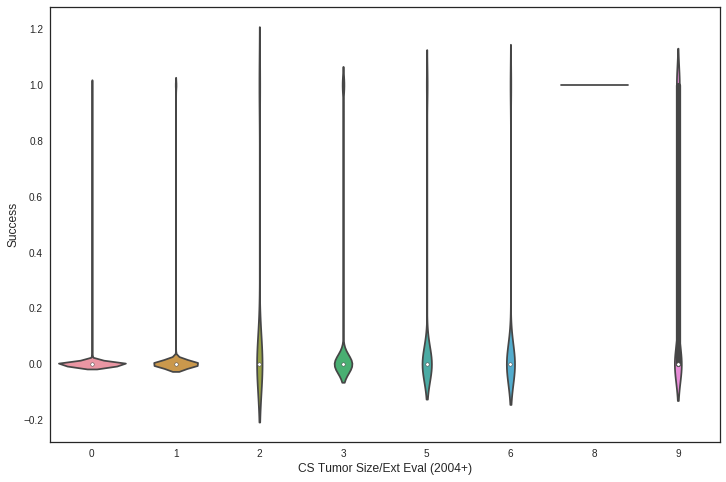

In [0]:
df['CS Tumor Size/Ext Eval (2004+)'].unique()
sns.violinplot(df['CS Tumor Size/Ext Eval (2004+)'],df['Success'],  alpha=0.8)

In [0]:

#drop.na
df=df.drop(columns = ['CS version derived (2004+)', 'Unnamed: 39'])


NameError: ignored

<Figure size 288x144 with 0 Axes>

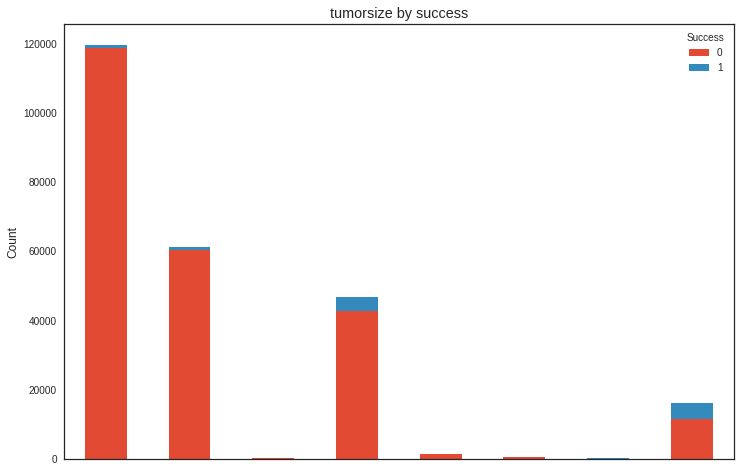

In [0]:
plt.figure(figsize=[4,2])

ax1 =pd.crosstab(df['CS Tumor Size/Ext Eval (2004+)'],df['Success']).plot(kind='bar',stacked=True)
plt.title('tumorsize by success')
plt.ylabel('Count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.axes.get_xaxis().set_visible(False)


N = train_df['CS Tumor Size/Ext Eval (2004+)'].nunique()
ind = np.arange(N)
table=pd.crosstab(df['CS Tumor Size/Ext Eval (2004+)'],df['Success'])
ax2 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CS Tumor Size/Ext Eval (2004+)')
plt.ylabel('Proportion')
ax2.get_legend().remove()
plt.show()

## Reginal Node Eval

NameError: ignored

<Figure size 288x144 with 0 Axes>

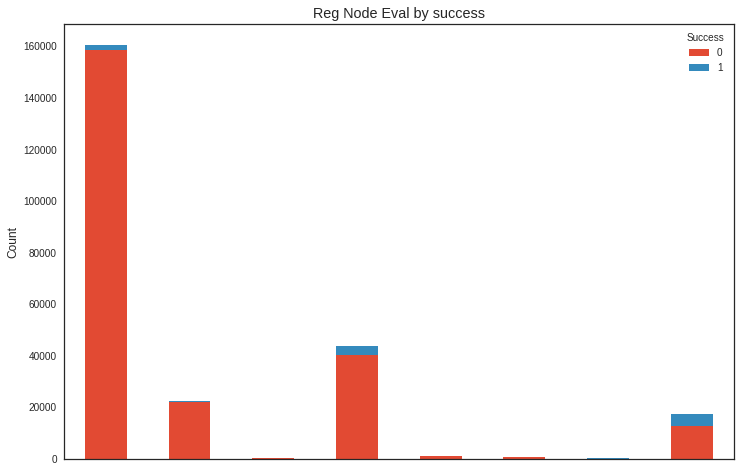

In [0]:
plt.figure(figsize=[4,2])

ax1 =pd.crosstab(df['CS Reg Node Eval (2004+)'],df['Success']).plot(kind='bar',stacked=True)
plt.title('Reg Node Eval by success')
plt.ylabel('Count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.axes.get_xaxis().set_visible(False)


N = train_df['CS Reg Node Eval (2004+)'].nunique()
ind = np.arange(N)
table=pd.crosstab(df['CS Reg Node Eval (2004+)'],df['Success'])
ax2 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CS Reg Node Eval (2004+)')
plt.ylabel('Proportion')
ax2.get_legend().remove()
plt.show()

## By grade

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


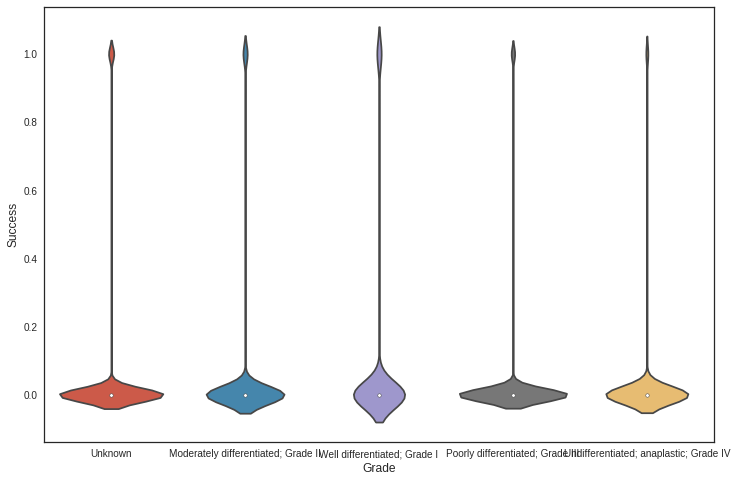

In [0]:
df['Grade'].unique()
sns.violinplot(df['Grade'],df['Success'],  alpha=0.8)